## Лабораторная работа № 2 "Методы классификации данных"
### Школкин В.В. М19-ТС
### Вариант 14(3 / 3, 4)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
%matplotlib inline

### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [4]:
zoo_data_df = pd.read_csv("zoo.csv")
zoo_data_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
class_data_df = pd.read_csv("class.csv")
class_data_df.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


#### zoo.csv
Этот набор данных состоит из 101 животного из зоопарка. Существует 16 переменных с различными признаками для описания животных. 7 Типов классов: Млекопитающие, Птицы, Рептилии, Рыбы, Амфибии, Клопы и Беспозвоночные.
Набор включает в себя следующие показатели:
- Название животного: Уникальный для каждого экземпляра
- волосы
- перья 
- яйца 
- молоко 
- воздушные 
- водные 
- хищники 
- зубчатые
- позвоночник 
- дышит 
- ядовитый 
- плавники
- число ног (набор значений: {0,2,4,5,6,8})
- хвост
- домашний
- класс

#### class.csv
Этот файл описывает набор данных и включает в себя следующие показатели:
- Номер класса (целочисленные значения в диапазоне [1,7]
- Количество видов животных в классе
- Символ типа класса - фактическое словесное описание класса
- Список животных, попадающих в категорию данного класса

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [6]:
print("До удаления дубликатов:", zoo_data_df.shape)
zoo_data_df.drop_duplicates()
print("После удаления дубликатов:", zoo_data_df.shape)

До удаления дубликатов: (101, 18)
После удаления дубликатов: (101, 18)


### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:xlabel='class_type'>

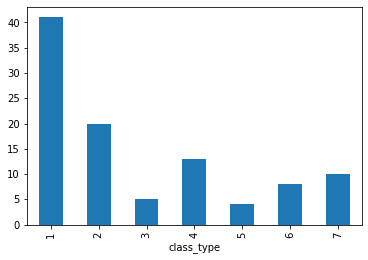

In [8]:
zoo_data_df.groupby(["class_type"])["class_type"].count().plot(kind='bar')

### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [9]:
zoo_data_df.describe()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<AxesSubplot:>

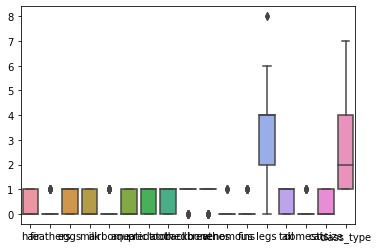

In [15]:
categorical_columns = [column for column in zoo_data_df.columns if zoo_data_df[column].dtype.name == 'object']
numerical_columns   = [column for column in zoo_data_df.columns if zoo_data_df[column].dtype.name != 'object']
sns.boxplot(data = zoo_data_df[numerical_columns])

<AxesSubplot:>

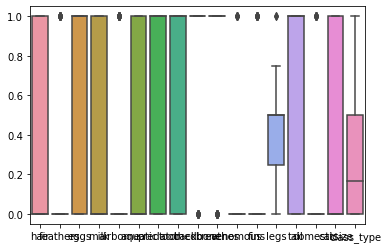

In [20]:
# Нормализация
zoo_data_df[numerical_columns] = preprocessing.MinMaxScaler().fit_transform(zoo_data_df[numerical_columns].values.
                                                                            astype(float)) 
sns.boxplot(data = zoo_data_df[numerical_columns])

### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Т.к категория "animal_name" единственная - сделаем для нее кодировку с помощью LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(zoo_data_df.animal_name)
zoo_data_df["animal_name"] = le.transform(zoo_data_df.animal_name)
zoo_data_df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.000000
1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
2,2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0,0.500000
3,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0,0.000000
4,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0,0.000000
97,96,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0,0.833333
98,97,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0,0.000000
99,98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,1.000000


### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

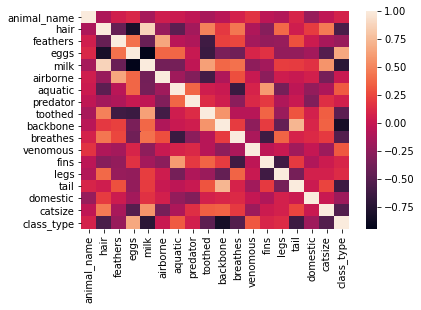

In [24]:
corr_matrix = zoo_data_df.corr()
sns.heatmap(corr_matrix);

### 7.	Заполните пропущенные значения в данных

In [25]:
zoo_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   animal_name  101 non-null    int32  
 1   hair         101 non-null    float64
 2   feathers     101 non-null    float64
 3   eggs         101 non-null    float64
 4   milk         101 non-null    float64
 5   airborne     101 non-null    float64
 6   aquatic      101 non-null    float64
 7   predator     101 non-null    float64
 8   toothed      101 non-null    float64
 9   backbone     101 non-null    float64
 10  breathes     101 non-null    float64
 11  venomous     101 non-null    float64
 12  fins         101 non-null    float64
 13  legs         101 non-null    float64
 14  tail         101 non-null    float64
 15  domestic     101 non-null    float64
 16  catsize      101 non-null    float64
 17  class_type   101 non-null    float64
dtypes: float64(17), int32(1)
memory usage: 13.9 KB


Пропущенных значений нет

### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку

In [26]:
zoo_data_df.drop('animal_name', axis=1, inplace = True)
data_X, data_Y = zoo_data_df.drop('predator', axis=1).values, zoo_data_df['predator']
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3, random_state = 123)

print (train_x.shape)
print (test_x.shape)
# делим набор данных на обучающую и тестовые выборки в соотношении 70/30

(70, 16)
(31, 16)


#### 8.1 Линейный классификатор (Персептрон)

In [27]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 50)],
}, n_jobs=-1)
search.fit(train_x, train_y)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(train_x, train_y)
ppn_predict = ppn.predict(test_x)
print('Accuracy ppn: %.5f' % accuracy_score(test_y, ppn_predict))

best: 0.6714285714285715 alpha: 0.05263157894736842 max_iter: 10
Accuracy ppn: 0.64516


#### 8.2 Логический классификатор (бинарное решающее дерево)

In [28]:
dtc = DecisionTreeClassifier()

dtc_grid = GridSearchCV(dtc, {'max_depth': list(range(1, 5)), 'max_features': list(range(1, 5))})
dtc_grid.fit (train_x, train_y)
best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_

print('best score:', best_score, 
      ', features number:', best_features,
      ', depth:', best_depth)
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(train_x, train_y)
best_score = np.mean(test_y == dtc.predict(test_x))
print('test score:', best_score)

best score: 0.6857142857142857 , features number: 2 , depth: 2
test score: 0.6129032258064516
